In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('processed.cleveland.data', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'hd'
]

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.hd.unique()


array([0, 2, 1, 3, 4], dtype=int64)

### Inspect data


In [6]:
df.dtypes


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [7]:
df.ca.unique()


array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df.thal.unique()


array(['6.0', '3.0', '7.0', '?'], dtype=object)

Check how many rows that has missing data


In [9]:
len(df)


303

In [10]:
len(df.loc[(df.ca == '?') | (df.thal == '?')])


6

In [11]:
df.loc[(df.ca == '?') | (df.thal == '?')]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
df = df.loc[(df.ca != '?') & (df.thal != '?')]


In [13]:
len(df)


297

In [14]:
df.ca.unique()


array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df.thal.unique()


array(['6.0', '3.0', '7.0'], dtype=object)

In [16]:
df.dtypes


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

## Split data into independent and dependent variables


In [17]:
X = df.drop('hd', axis=1).copy()
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [18]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [19]:
y = df.hd.copy()
y.head()


0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

age - float
sex - 0, 1
cp - 1, 2, 3, 4
trestbps - float
chol - float
fbs - 0, 1
restecg - 0, 1, 2
thalach - float
exang - 0, 1
oldpeak - float
slope - 1, 2, 3
ca - float
thal - 3, 6, 7

In [20]:
X.sex.unique()


array([1., 0.])

In [21]:
X.cp.unique()


array([1., 4., 3., 2.])

In [22]:
X.fbs.unique()


array([1., 0.])

In [23]:
X.restecg.unique()


array([2., 0., 1.])

## Format independent variables with one-hot encoding


In [24]:
pd.get_dummies(X, columns=['restecg']).head()


,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,restecg_0.0,restecg_1.0,restecg_2.0
0,63.0,1.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,1


In [25]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])


In [26]:
X_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


## Make dependent variable binary


In [27]:
y.unique()


array([0, 2, 1, 3, 4], dtype=int64)

In [28]:
y_not_zero_index = y > 0


In [29]:
y_not_zero_index


0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: hd, Length: 297, dtype: bool

In [30]:
y[y_not_zero_index] = 1


In [31]:
y.unique()


array([0, 1], dtype=int64)

## Preliminary Classification Tree


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.33)


In [33]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)


[Text(0.5135869565217391, 0.9545454545454546, 'ca <= 0.5\ngini = 0.497\nsamples = 198\nvalue = [107, 91]\nclass = No HD'),
 Text(0.2608695652173913, 0.8636363636363636, 'thal_3.0 <= 0.5\ngini = 0.345\nsamples = 113\nvalue = [88, 25]\nclass = No HD'),
 Text(0.17391304347826086, 0.7727272727272727, 'age <= 51.5\ngini = 0.498\nsamples = 36\nvalue = [17, 19]\nclass = Risk pf HD'),
 Text(0.08695652173913043, 0.6818181818181818, 'cp_4.0 <= 0.5\ngini = 0.36\nsamples = 17\nvalue = [4, 13]\nclass = Risk pf HD'),
 Text(0.043478260869565216, 0.5909090909090909, 'trestbps <= 115.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No HD'),
 Text(0.021739130434782608, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Risk pf HD'),
 Text(0.06521739130434782, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No HD'),
 Text(0.13043478260869565, 0.5909090909090909, 'trestbps <= 115.0\ngini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = Risk pf HD'),
 Text(0.10869565217391304, 0.5, 'chol <= 

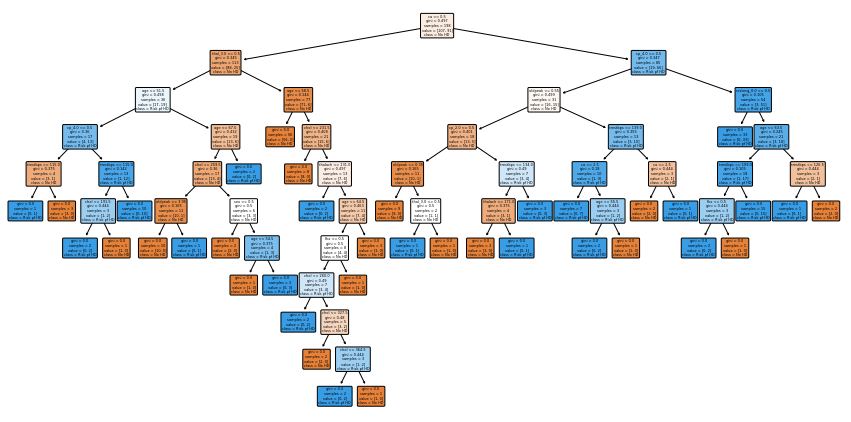

In [34]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['No HD', 'Risk of HD'],
          feature_names=X_encoded.columns)


c:\code\ml\dec_tree\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


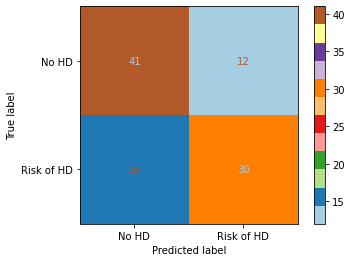

In [39]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Risk of HD'], cmap='Paired')


In [37]:
print(f'{(41/(41+12))*100:.2f}% predicted No HD')
print(f'{(30/(30+16))*100:.2f}% predicted Risk of HD')


77.36% predicted No HD
65.22% predicted Risk of HD
